In [29]:
path_data = '../../../data/'

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [30]:
# Read two books, fast (again)!

huck_finn_path = path_data + 'huck_finn.txt'
with open(huck_finn_path, 'r') as ff:
    huck_finn_text = ff.read()
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_path = path_data + 'little_women.txt'
with open(little_women_path, 'r') as ff:
    little_women_text = ff.read()
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

# Literary Characters
*The Adventures of Huckleberry Finn* describes a journey that Huck and Jim take along the Mississippi River. Tom Sawyer joins them towards the end as the action heats up. Having loaded the text, we can quickly visualize how many times these characters have each been mentioned at any point in the book.

   Jim  Tom  Huck
0    0    6     3
1   16   30     5
2   16   35     7
3   24   35     8
4   24   35     8


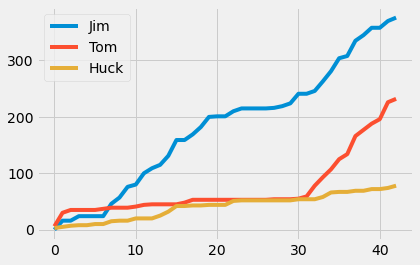

In [31]:
varA = np.char.count(huck_finn_chapters, 'Jim')
varB = np.char.count(huck_finn_chapters, 'Tom')
varC = np.char.count(huck_finn_chapters, 'Huck')

chapter_mentions = pd.DataFrame({'Jim': varA.cumsum(), 'Tom': varB.cumsum(), 'Huck':varC.cumsum()})
print(chapter_mentions.head())
chapter_mentions.plot()

plt.show()

# when creating this chart we have used both pandas 'plot' and matplotlib 'plt'. This is quite common.

In the plot above, the horizontal axis shows chapter numbers and the vertical axis shows how many times each character has been mentioned up to and including that chapter. 

You can see that Jim is a central character by the large number of times his name appears. Notice how Tom is hardly mentioned for much of the book until he arrives and joins Huck and Jim, after Chapter 30. His curve and Jim's rise sharply at that point, as the action involving both of them intensifies. As for Huck, his name hardly appears at all, because he is the narrator. 

*Little Women* is a story of four sisters growing up together during the civil war. In this book, chapter numbers are spelled out and chapter titles are written in all capital letters.

In [32]:
# The chapters of Little Women, as a DataFrame - index, column 0

pd.DataFrame({'Chapters':little_women_chapters}).head(10)

Chapters
0  ONE\n\nPLAYING PILGRIMS\n\n"Christmas won't be...
1  TWO\n\nA MERRY CHRISTMAS\n\nJo was the first t...
2  THREE\n\nTHE LAURENCE BOY\n\n"Jo!  Jo!  Where ...
3  FOUR\n\nBURDENS\n\n"Oh, dear, how hard it does...
4  FIVE\n\nBEING NEIGHBORLY\n\n"What in the world...
5  SIX\n\nBETH FINDS THE PALACE BEAUTIFUL\n\nThe ...
6  SEVEN\n\nAMY'S VALLEY OF HUMILIATION\n\n"That ...
7  EIGHT\n\nJO MEETS APOLLYON\n\n"Girls, where ar...
8  NINE\n\nMEG GOES TO VANITY FAIR\n\n"I do think...
9  TEN\n\nTHE P.C. AND P.O.\n\nAs spring came on,...

We can track the mentions of main characters to learn about the plot of this book as well.  The protagonist Jo interacts with her sisters Meg, Beth, and Amy regularly, up until Chapter 27 when she moves to New York alone.

   Amy  Beth   Jo  Meg  Laurie
0   23    26   44   26       0
1   36    38   65   46       0
2   38    40  127   82      16
3   52    58  161   99      16
4   58    72  216  112      51


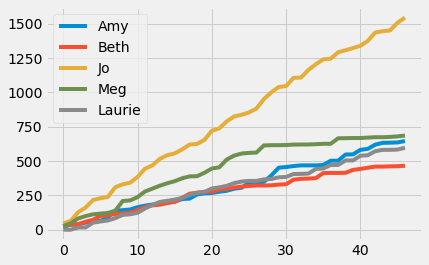

In [33]:
# Counts of names in the chapters of Little Women

varD = np.char.count(little_women_chapters,'Amy')
varE = np.char.count(little_women_chapters,'Beth')
varF = np.char.count(little_women_chapters,'Jo')
varG = np.char.count(little_women_chapters,'Meg')
varH = np.char.count(little_women_chapters,'Laurie')

chapter_mentions = pd.DataFrame({'Amy': varD.cumsum(), 
                                 'Beth': varE.cumsum(), 
                                 'Jo':varF.cumsum(), 
                                'Meg':varG.cumsum(),
                                'Laurie':varH.cumsum()})

# cumulative sum

# cumsum - numpy
# https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html#numpy-cumsum

# or

# cumsum - pandas
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html#pandas-dataframe-cumsum

print(chapter_mentions.head())
chapter_mentions.plot()

plt.show()

Laurie is a young man who marries one of the girls in the end. See if you can use the plots to guess which one.